# NFL Combine Data Analysis - QB

## Kevin Petruzzelli

#### Import Libraries

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import sklearn

#### Load Combine Data that will be used in the analysis

In [93]:
df_combine = pd.read_csv("Combine_Data.csv")
print df_combine.isnull().sum().sort_values(ascending=False) 

print("Combine Data Shape", df_combine.shape)

Unnamed: 27          4945
Unnamed: 26          4945
pick                 1789
college              1470
picktotal               2
fortyyd                 0
name                    0
firstname               0
lastname                0
position                0
heightfeet              0
heightinches            0
heightinchestotal       0
weight                  0
arms                    0
hands                   0
tenyd                   0
twentyyd                0
twentyss                0
threecone               0
vertical                0
broad                   0
bench                   0
round                   0
pickround               0
wonderlic               0
nflgrade                0
year                    0
dtype: int64
('Combine Data Shape', (4947, 28))


#### Drop Uneccessary Columns and View Data

In [94]:
df_combine.drop(['Unnamed: 26', 'Unnamed: 27'], axis = 1, inplace = True)
df_combine = df_combine.convert_objects(convert_numeric=True)
df_combine = df_combine.replace(0,df_combine.median())
df_combine.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
0,2015,"Abdullah, Ameer",Ameer,Abdullah,RB,5.0,9.0,69.0,205,0.0,...,42.50,130.0,24.0,2,NaN,NaN,7.0,42.0,0,5.9
1,2015,"Agholor, Nelson",Nelson,Agholor,WR,6.0,4.0,72.0,198,0.0,...,35.54,120.0,12.0,2,NaN,NaN,7.0,42.0,0,5.6
2,2015,"Ajayi, Jay",Jay,Ajayi,RB,6.0,4.0,72.0,221,0.0,...,39.00,121.0,19.0,2,NaN,NaN,7.0,42.0,0,6.0
3,2015,"Alexander, Kwon",Kwon,Alexander,OLB,6.0,1.0,73.0,227,0.0,...,36.00,121.0,24.0,2,NaN,NaN,7.0,42.0,0,5.4
4,2015,"Alford, Mario",Mario,Alford,WR,5.0,8.0,68.0,180,0.0,...,34.00,121.0,13.0,2,NaN,NaN,7.0,42.0,0,5.3


#### Create combine dataframe by position

In [95]:
df_wr_combine = df_combine.ix[df_combine['position'] == 'WR']
df_rb_combine = df_combine.ix[df_combine['position'] == 'RB']
df_qb_combine = df_combine.ix[df_combine['position'] == 'QB']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [96]:
df_qb_combine.head()

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
19,2015,"Bennett, Bryan",Bryan,Bennett,QB,6.0,2.0,74.0,211,0.0,...,37.0,125.0,16.0,2,NaN,NaN,7.0,42.0,0,0.0
25,2015,"Boone, Anthony",Anthony,Boone,QB,6.0,4.0,72.0,231,0.0,...,26.5,100.0,16.0,2,NaN,NaN,7.0,42.0,0,5.0
28,2015,"Bridge, Brandon",Brandon,Bridge,QB,6.0,4.0,76.0,229,0.0,...,33.0,110.0,16.0,2,NaN,NaN,7.0,42.0,0,5.0
39,2015,"Carden, Shane",Shane,Carden,QB,6.0,2.0,74.0,218,0.0,...,29.5,104.0,16.0,2,NaN,NaN,7.0,42.0,0,5.1
101,2015,"Fajardo, Cody",Cody,Fajardo,QB,6.0,1.0,73.0,223,0.0,...,32.5,118.0,16.0,2,NaN,NaN,7.0,42.0,0,5.0


In [97]:
df_qb_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 19 to 4941
Data columns (total 26 columns):
year                 304 non-null int64
name                 304 non-null object
firstname            304 non-null object
lastname             304 non-null object
position             304 non-null object
heightfeet           304 non-null float64
heightinches         304 non-null float64
heightinchestotal    304 non-null float64
weight               304 non-null int64
arms                 304 non-null float64
hands                304 non-null float64
fortyyd              304 non-null float64
twentyyd             304 non-null float64
tenyd                304 non-null float64
twentyss             304 non-null float64
threecone            304 non-null float64
vertical             304 non-null float64
broad                304 non-null float64
bench                304 non-null float64
round                304 non-null int64
college              0 non-null float64
pick                 19

#### Identify time period of data

In [98]:
print("Min year of data", df_combine.year.min())
print("Max year of data", df_combine.year.max())

('Min year of data', 1999)
('Max year of data', 2015)


#### Load  QB data

In [99]:
df_passing = pd.read_csv("Career_Stats_Passing.csv")
print df_passing.isnull().sum().sort_values(ascending=False) 

print("Passing Data Shape", df_passing.shape)

Position                          7414
Passer Rating                        0
Passing Yards                        0
Name                                 0
Year                                 0
Team                                 0
Games Played                         0
Passes Attempted                     0
Passes Completed                     0
Completion Percentage                0
Pass Attempts Per Game               0
Passing Yards Per Attempt            0
Sacked Yards Lost                    0
Passing Yards Per Game               0
TD Passes                            0
Percentage of TDs per Attempts       0
Ints                                 0
Int Rate                             0
Longest Pass                         0
Passes Longer than 20 Yards          0
Passes Longer than 40 Yards          0
Sacks                                0
Player Id                            0
dtype: int64
('Passing Data Shape', (8525, 23))


In [100]:
df_passing.head()

,Player Id,Name,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,...,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Longest Pass,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
0,tomfarris/2513861,"Farris, Tom",NaN,1948,Chicago Rockets,0,--,--,--,0.0,...,--,--,--,--,--,--,--,--,--,0.0
1,tomfarris/2513861,"Farris, Tom",NaN,1947,Chicago Bears,9,2,0,0.0,0.2,...,0,0.0,0,0.0,--,0,0,0,0,39.6
2,tomfarris/2513861,"Farris, Tom",NaN,1946,Chicago Bears,11,21,8,38.1,1.9,...,1,4.8,2,9.5,--,0,0,0,0,31.5
3,billdemory/2512778,"Demory, Bill",NaN,1974,New York Jets,1,--,--,--,0.0,...,--,--,--,--,--,--,--,--,--,0.0
4,billdemory/2512778,"Demory, Bill",NaN,1973,New York Jets,6,39,12,30.8,6.5,...,2,5.1,8,20.5,--,0,0,8,73,22.2


#### Remove data that exists in years outside of our combine data set

In [101]:
print ("Count of rows prior to drop",df_passing['Year'].count())
df_passing = df_passing.drop(df_passing[df_passing.Year < 1999].index)
df_passing = df_passing.drop(df_passing[df_passing.Year > 2015].index)
#df_passing = df_passing.drop(df_passing[df_passing['Games Played'] < 8].index)
print ("Count of rows post drop",df_passing['Year'].count())

('Count of rows prior to drop', 8525)
('Count of rows post drop', 2523)


#### Clean receiving data

In [102]:
df_passing.columns = df_passing.columns.str.strip()
df_passing.replace({'--': '0'}, regex=True)
df_passing = df_passing.convert_objects(convert_numeric=True)
df_passing.head(100)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,Player Id,Name,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,...,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Longest Pass,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
17,tomsavage/2543640,"Savage, Tom",QB,2014,Houston Texans,2,19.0,10.0,52.6,9.5,...,0.0,0.0,1.0,5.3,35.0,2.0,0.0,1.0,5.0,51.9
21,tommymaddox/2501842,"Maddox, Tommy",NaN,2005,Pittsburgh Steelers,4,71.0,34.0,47.9,17.8,...,2.0,2.8,4.0,5.6,32.0,6.0,0.0,8.0,43.0,51.7
22,tommymaddox/2501842,"Maddox, Tommy",NaN,2004,Pittsburgh Steelers,4,60.0,30.0,50.0,15.0,...,1.0,1.7,2.0,3.3,39.0,4.0,0.0,6.0,37.0,58.3
23,tommymaddox/2501842,"Maddox, Tommy",NaN,2003,Pittsburgh Steelers,16,519.0,298.0,57.4,32.4,...,18.0,3.5,17.0,3.3,53.0,44.0,4.0,41.0,242.0,75.3
24,tommymaddox/2501842,"Maddox, Tommy",NaN,2002,Pittsburgh Steelers,15,377.0,234.0,62.1,25.1,...,20.0,5.3,16.0,4.2,NaN,40.0,6.0,26.0,148.0,85.2
25,tommymaddox/2501842,"Maddox, Tommy",NaN,2001,Pittsburgh Steelers,3,9.0,7.0,77.8,3.0,...,1.0,11.1,1.0,11.1,57.0,4.0,2.0,1.0,4.0,116.2
191,teemartin/2504246,"Martin, Tee",NaN,2003,Oakland Raiders,2,16.0,6.0,37.5,8.0,...,0.0,0.0,1.0,6.3,17.0,0.0,0.0,1.0,5.0,25.3
192,teemartin/2504246,"Martin, Tee",NaN,2001,Pittsburgh Steelers,1,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
193,teemartin/2504246,"Martin, Tee",NaN,2000,Pittsburgh Steelers,0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
196,mariobates/2499570,"Bates, Mario",NaN,2000,Detroit Lions,13,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


#### Create average passing yards and average touchdowns per season data set

In [103]:
df_passingyds_mean = df_passing.groupby('Name', as_index=False)[['Passing Yards','TD Passes']].mean()
df_passingyds_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 3 columns):
Name             406 non-null object
Passing Yards    326 non-null float64
TD Passes        354 non-null float64
dtypes: float64(2), object(1)
memory usage: 12.7+ KB


In [104]:
df_passingyds_mean.columns

Index([u'Name', u'Passing Yards', u'TD Passes'], dtype='object')

In [105]:
df_passingyds_mean = df_passingyds_mean.convert_objects(convert_numeric=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [106]:
df_passingyds_mean.tail()

,Name,Passing Yards,TD Passes
401,"Young, Steve",446.0,3.000000
402,"Young, Vince",542.5,7.666667
403,"Zastudil, Dave",0.0,0.000000
404,"Zeier, Eric",144.5,0.000000
405,"Zolak, Scott",0.0,0.000000


In [107]:
df_passingyds_mean.fillna(0)

,Name,Passing Yards,TD Passes
0,"Addai, Joseph",11.000000,0.500000
1,"Aguiar, Louie",13.000000,0.000000
2,"Aikman, Troy",0.000000,12.000000
3,"Akers, David",12.500000,0.500000
4,"Alexander, Danario",0.000000,0.000000
5,"Allen, James",5.000000,1.000000
6,"Alstott, Mike",0.000000,0.000000
7,"Amendola, Danny",36.000000,0.000000
8,"Anderson, Derek",495.200000,7.250000
9,"Anderson, Jamal",0.000000,0.000000


In [108]:
df_passingyds_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 3 columns):
Name             406 non-null object
Passing Yards    326 non-null float64
TD Passes        354 non-null float64
dtypes: float64(2), object(1)
memory usage: 12.7+ KB


#### Join receiving data to combine data

In [109]:
df_passingyds_mean.rename(columns={'Name': 'QBName', 'Passing Yards': 'SeasonAvgPassYds', 'TD Passes':'SeasonAvgPassTDs'}, inplace=True)

In [110]:
df_qb_clean = df_qb_combine.merge(df_passingyds_mean, left_on='name', right_on='QBName', how='left')

In [111]:
df_qb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 303
Data columns (total 29 columns):
year                 304 non-null int64
name                 304 non-null object
firstname            304 non-null object
lastname             304 non-null object
position             304 non-null object
heightfeet           304 non-null float64
heightinches         304 non-null float64
heightinchestotal    304 non-null float64
weight               304 non-null int64
arms                 304 non-null float64
hands                304 non-null float64
fortyyd              304 non-null float64
twentyyd             304 non-null float64
tenyd                304 non-null float64
twentyss             304 non-null float64
threecone            304 non-null float64
vertical             304 non-null float64
broad                304 non-null float64
bench                304 non-null float64
round                304 non-null int64
college              0 non-null float64
pick                 19 n

In [112]:
df_qb_clean.fillna(df_qb_clean.mean())

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,round,college,pick,pickround,picktotal,wonderlic,nflgrade,QBName,SeasonAvgPassYds,SeasonAvgPassTDs
0,2015,"Bennett, Bryan",Bryan,Bennett,QB,6.0,2.0,74.0,211,0.0,...,2,NaN,0.0,7.0,42.0,0,0.0,NaN,279.687306,8.138026
1,2015,"Boone, Anthony",Anthony,Boone,QB,6.0,4.0,72.0,231,0.0,...,2,NaN,0.0,7.0,42.0,0,5.0,NaN,279.687306,8.138026
2,2015,"Bridge, Brandon",Brandon,Bridge,QB,6.0,4.0,76.0,229,0.0,...,2,NaN,0.0,7.0,42.0,0,5.0,NaN,279.687306,8.138026
3,2015,"Carden, Shane",Shane,Carden,QB,6.0,2.0,74.0,218,0.0,...,2,NaN,0.0,7.0,42.0,0,5.1,NaN,279.687306,8.138026
4,2015,"Fajardo, Cody",Cody,Fajardo,QB,6.0,1.0,73.0,223,0.0,...,2,NaN,0.0,7.0,42.0,0,5.0,NaN,279.687306,8.138026
5,2015,"Grayson, Garrett",Garrett,Grayson,QB,6.0,2.0,74.0,213,0.0,...,2,NaN,0.0,7.0,42.0,0,5.4,NaN,279.687306,8.138026
6,2015,"Halliday, Connor",Connor,Halliday,QB,6.0,3.0,75.0,196,0.0,...,2,NaN,0.0,7.0,42.0,0,5.1,NaN,279.687306,8.138026
7,2015,"Hundley, Brett",Brett,Hundley,QB,6.0,3.0,75.0,226,0.0,...,2,NaN,0.0,7.0,42.0,0,5.5,"Hundley, Brett",279.687306,8.138026
8,2015,"Lovelocke, Jerry",Jerry,Lovelocke,QB,6.0,4.0,76.0,248,0.0,...,2,NaN,0.0,7.0,42.0,0,0.0,NaN,279.687306,8.138026
9,2015,"Mannion, Sean",Sean,Mannion,QB,6.0,6.0,78.0,229,0.0,...,2,NaN,0.0,7.0,42.0,0,5.3,"Mannion, Sean",31.000000,0.000000


In [113]:
df_qb_clean.head(10)

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,round,college,pick,pickround,picktotal,wonderlic,nflgrade,QBName,SeasonAvgPassYds,SeasonAvgPassTDs
0,2015,"Bennett, Bryan",Bryan,Bennett,QB,6.0,2.0,74.0,211,0.0,...,2,NaN,NaN,7.0,42.0,0,0.0,NaN,NaN,NaN
1,2015,"Boone, Anthony",Anthony,Boone,QB,6.0,4.0,72.0,231,0.0,...,2,NaN,NaN,7.0,42.0,0,5.0,NaN,NaN,NaN
2,2015,"Bridge, Brandon",Brandon,Bridge,QB,6.0,4.0,76.0,229,0.0,...,2,NaN,NaN,7.0,42.0,0,5.0,NaN,NaN,NaN
3,2015,"Carden, Shane",Shane,Carden,QB,6.0,2.0,74.0,218,0.0,...,2,NaN,NaN,7.0,42.0,0,5.1,NaN,NaN,NaN
4,2015,"Fajardo, Cody",Cody,Fajardo,QB,6.0,1.0,73.0,223,0.0,...,2,NaN,NaN,7.0,42.0,0,5.0,NaN,NaN,NaN
5,2015,"Grayson, Garrett",Garrett,Grayson,QB,6.0,2.0,74.0,213,0.0,...,2,NaN,NaN,7.0,42.0,0,5.4,NaN,NaN,NaN
6,2015,"Halliday, Connor",Connor,Halliday,QB,6.0,3.0,75.0,196,0.0,...,2,NaN,NaN,7.0,42.0,0,5.1,NaN,NaN,NaN
7,2015,"Hundley, Brett",Brett,Hundley,QB,6.0,3.0,75.0,226,0.0,...,2,NaN,NaN,7.0,42.0,0,5.5,"Hundley, Brett",NaN,NaN
8,2015,"Lovelocke, Jerry",Jerry,Lovelocke,QB,6.0,4.0,76.0,248,0.0,...,2,NaN,NaN,7.0,42.0,0,0.0,NaN,NaN,NaN
9,2015,"Mannion, Sean",Sean,Mannion,QB,6.0,6.0,78.0,229,0.0,...,2,NaN,NaN,7.0,42.0,0,5.3,"Mannion, Sean",31.0,0.0


#### Explore variable correlations

                    fortyyd  threecone  vertical     bench     broad  \
fortyyd            1.000000   0.218886 -0.633647 -0.016420 -0.615080   
threecone          0.218886   1.000000 -0.206553  0.025383 -0.273647   
vertical          -0.633647  -0.206553  1.000000 -0.035509  0.677823   
bench             -0.016420   0.025383 -0.035509  1.000000 -0.013119   
broad             -0.615080  -0.273647  0.677823 -0.013119  1.000000   
heightinchestotal  0.225281   0.105774 -0.169028  0.025429 -0.047048   
weight             0.211460   0.037208 -0.145560  0.074705 -0.066155   
hands             -0.089405  -0.055205  0.080040 -0.027665  0.129186   

                   heightinchestotal    weight     hands  
fortyyd                     0.225281  0.211460 -0.089405  
threecone                   0.105774  0.037208 -0.055205  
vertical                   -0.169028 -0.145560  0.080040  
bench                       0.025429  0.074705 -0.027665  
broad                      -0.047048 -0.066155  0.129186

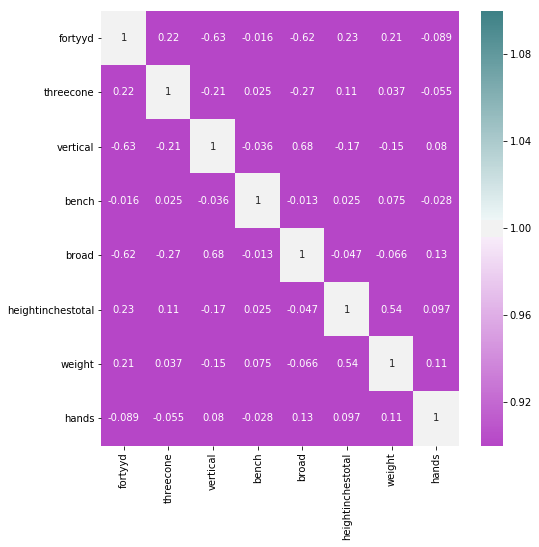

In [114]:
import seaborn as sns

plt.figure(figsize=(8,8))
cmap = sns.diverging_palette(300, 200, as_cmap=True)

correlations = df_qb_clean[['fortyyd', 'threecone', 'vertical', 'bench','broad', 'heightinchestotal', 'weight', 'hands']].corr()
print(correlations)
sns.heatmap(correlations, cmap=cmap, vmin = 1, vmax = 1, annot = True)


In [115]:
df_qb_clean = df_qb_clean[np.isfinite(df_qb_clean['SeasonAvgPassYds'])]
df_qb_clean = df_qb_clean[np.isfinite(df_qb_clean['SeasonAvgPassTDs'])]
df_qb_clean.head(1)

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,round,college,pick,pickround,picktotal,wonderlic,nflgrade,QBName,SeasonAvgPassYds,SeasonAvgPassTDs
9,2015,"Mannion, Sean",Sean,Mannion,QB,6.0,6.0,78.0,229,0.0,...,2,NaN,NaN,7.0,42.0,0,5.3,"Mannion, Sean",31.0,0.0


#### Create QB regression models

In [116]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
qb_yd_lm = LinearRegression()
qb_yd_lm_lasso = Lasso()
qb_yd_lm_ridge = Ridge()

#### Create target and predictor variables

In [117]:
X = df_qb_clean[['fortyyd', 'threecone', 'vertical', 'bench','broad', 'heightinchestotal', 'weight']]
y = df_qb_clean[['SeasonAvgPassYds']]

In [118]:
import statsmodels.api as sm

model = sm.OLS(y,X)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:       SeasonAvgPassYds   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     21.11
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           9.51e-16
Time:                        10:44:52   Log-Likelihood:                -581.43
No. Observations:                  86   AIC:                             1177.
Df Residuals:                      79   BIC:                             1194.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
fortyyd            -132.7430    164.25

#### Split train and test data sets

In [119]:
import sklearn.cross_validation 
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y,test_size = 0.20, random_state = 5)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(68, 7)
(18, 7)
(68, 1)
(18, 1)


#### Fit the models to train data

In [120]:
qb_yd_lm.fit(X_train,y_train)
qb_yd_lm_lasso.fit(X_train,y_train)
qb_yd_lm_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [122]:
y_predict = qb_yd_lm.predict(X_test)

print qb_yd_lm.score(X_test,y_test)
print qb_yd_lm.score(X_train,y_train)

-0.0220750252095
0.0635167973114


#### Check for regularization model improvement

In [ ]:
y_predict = qb_yd_lm_lasso.predict(X_test)

print mean_squared_error(y_predict, y_test)

print qb_yd_lm_lasso.score(X_test,y_test)

In [ ]:
y_predict = qb_yd_lm_ridge.predict(X_test)

print mean_squared_error(y_test, y_predict)

print qb_yd_lm_ridge.score(X_test,y_test)

In [ ]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, qb_yd_lm.coef_[0][idx]))

In [ ]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, qb_yd_lm_ridge.coef_[0][idx]))

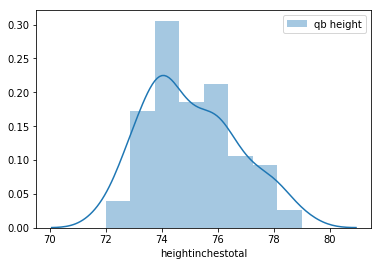

In [125]:
sns.distplot(df_qb_clean['heightinchestotal'], label="qb height")
plt.legend()

#### Repeat model creation for TD target

In [ ]:
qb_td_lm = LinearRegression()
qb_td_lm_lasso = Lasso()
qb_td_lm_ridge = Ridge()

In [ ]:
X = df_qb_clean[['fortyyd', 'threecone', 'vertical', 'bench','broad', 'heightinchestotal', 'weight']]
y = df_qb_clean[['SeasonAvgPassTDs']]

In [ ]:
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y,test_size = 0.33, random_state = 5)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

In [ ]:
qb_td_lm.fit(X_train,y_train)
qb_td_lm_lasso.fit(X_train,y_train)
qb_td_lm_ridge.fit(X_train,y_train)

In [ ]:
print qb_td_lm.score(X_test, y_test)
print qb_td_lm_lasso.score(X_test, y_test)
print qb_td_lm_ridge.score(X_test, y_test)

In [ ]:
print "Linear Regression"
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, qb_td_lm.coef_[0][idx]))

In [ ]:
print df_qb_clean.bench.mean()

#### JOSH ALLEN Tds. Prediction: Top 2018 QB Prospect

In [ ]:
d = {'fortyyd': [4.75], 'threecone': [6.9], 'vertical': [33.5], 'bench': [.5],
     'broad': [119], 'heightinchestotal': [77],'weight': [233]}
df = pd.DataFrame(data=d)
df

y_predict = qb_td_lm.predict(df)
print y_predict